In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
import sys

# plt.style.use('siads')

2022-07-08 00:39:03.202789: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# sub_divide_interval = 4 # this is for plotting 5 time instance
sub_divide_interval = 20 # just plot one time instance

In [3]:


path = 'hist'

def plot_PDF(NAME, xlabel_name, zoom1_range_x, zoom1_range_y,
            zoom2_range_x,zoom2_range_y,zoom3_range_x,zoom3_range_y):
    num_plots=20
    colormap = plt.cm.rainbow

    plt.figure(figsize=(4,4))

    colors = [colormap(i) for i in np.linspace(0, 1,20)]

    for i in np.arange(0,20,sub_divide_interval):
        df_umag_pred = pd.read_csv(path+'/'+NAME+'_pred_'+str(i)+'.csv')
        df_umag_true = pd.read_csv(path+'/'+NAME+'_true_'+str(i)+'.csv')

        plt.plot(df_umag_pred['bin_extents'].values, df_umag_pred['bin_values'].values/df_umag_pred.values.sum(),'--',
                 markersize=2,
                 c=colors[i],label='reconstruction',lw=2)
        plt.plot(df_umag_true['bin_extents'].values, df_umag_true['bin_values'].values/df_umag_true.values.sum(),'-',
                 markersize=2,
                 c=colors[i],label='true',lw=2)
    plt.yscale('log')
    plt.legend(loc='best',fontsize=15)
    # plt.legend( bbox_to_anchor=(1.05, 0.5),fontsize=15)
    plt.xlabel(xlabel_name,fontsize=15)
    plt.ylabel('PDF',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.savefig('pngs/'+NAME+'_pdf_all.png',bbox_inches='tight')
    #     plt.plot(df_umag_true['bin_extents'].values, df_umag_true['bin_values'].values - df_umag_pred['bin_values'].values,
    #              '-',markersize=1,
    #              c=colors[i],label='true',lw=0.5)
    # plt.xlim([0.5,1])
    # plt.ylim([2000,4000])

    ## zoom in [1.0, 2.2]

    num_plots=20
    colormap = plt.cm.rainbow

    plt.figure(figsize=(4,4))

    colors = [colormap(i) for i in np.linspace(0, 1,20)]

    for i in range(0,20,sub_divide_interval):
        df_umag_pred = pd.read_csv(path+'/'+NAME+'_pred_'+str(i)+'.csv')
        df_umag_true = pd.read_csv(path+'/'+NAME+'_true_'+str(i)+'.csv')

        plt.plot(df_umag_pred['bin_extents'].values, df_umag_pred['bin_values'].values/df_umag_pred.values.sum(),'^-',markersize=1,
                 c=colors[i],label='pred - time step = '+str(i+1),lw=2)
        plt.plot(df_umag_true['bin_extents'].values, df_umag_true['bin_values'].values/df_umag_true.values.sum(),'o-',markersize=1,
                 c=colors[i],label='true - time step = '+str(i+1),lw=2)

    plt.yscale('log')    
    # plt.legend( bbox_to_anchor=(1.05, 0.5),fontsize=15)
    plt.xlim(zoom1_range_x)
    plt.ylim(zoom1_range_y)
    plt.xlabel(xlabel_name,fontsize=20)
    plt.ylabel('PDF',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.savefig('pngs/'+NAME+'_pdf_zoom_1.png',bbox_inches='tight')

    ## zoom in [0, 0.2]

    num_plots=20
    colormap = plt.cm.rainbow

    plt.figure(figsize=(4,4))

    colors = [colormap(i) for i in np.linspace(0, 1,20)]

    for i in range(0,20,sub_divide_interval):
        df_umag_pred = pd.read_csv(path+'/'+NAME+'_pred_'+str(i)+'.csv')
        df_umag_true = pd.read_csv(path+'/'+NAME+'_true_'+str(i)+'.csv')

        plt.plot(df_umag_pred['bin_extents'].values, df_umag_pred['bin_values'].values/df_umag_pred.values.sum(),'^-',
                 markersize=1,
                 c=colors[i],label='pred - time step = '+str(i+1),lw=1)
        plt.plot(df_umag_true['bin_extents'].values, df_umag_true['bin_values'].values/df_umag_true.values.sum(),'o-',
                 markersize=1,
                 c=colors[i],label='true - time step = '+str(i+1),lw=1)

    plt.yscale('log')    
    #  plt.legend( bbox_to_anchor=(1.05, 0.5),fontsize=15)
    plt.xlim(zoom2_range_x)
    plt.ylim(zoom2_range_y)
    plt.xlabel(xlabel_name,fontsize=20)
    plt.ylabel('PDF',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig('pngs/'+NAME+'_pdf_zoom_2.png',bbox_inches='tight')

    ## zoom in [2.4, 3]

    num_plots=20
    colormap = plt.cm.rainbow

    plt.figure(figsize=(4,4))

    colors = [colormap(i) for i in np.linspace(0, 1,20)]

    for i in range(0,20,sub_divide_interval):
        df_umag_pred = pd.read_csv(path+'/'+NAME+'_pred_'+str(i)+'.csv')
        df_umag_true = pd.read_csv(path+'/'+NAME+'_true_'+str(i)+'.csv')

        plt.plot(df_umag_pred['bin_extents'].values, df_umag_pred['bin_values'].values/df_umag_pred.values.sum(),'^-',
                 markersize=1,
                 c=colors[i],label='pred - time step = '+str(i+1),lw=1)
        plt.plot(df_umag_true['bin_extents'].values, df_umag_true['bin_values'].values/df_umag_true.values.sum(),'o-',markersize=1,
                 c=colors[i],label='true - time step = '+str(i+1),lw=1)

    plt.yscale('log')    
    # plt.legend( bbox_to_anchor=(1.05, 0.5),fontsize=15)
    plt.xlim(zoom3_range_x)
    plt.ylim(zoom3_range_y)
    plt.xlabel(xlabel_name,fontsize=20)
    plt.ylabel('PDF',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.savefig('pngs/'+NAME+'_pdf_zoom_3.png',bbox_inches='tight')



# Velocity

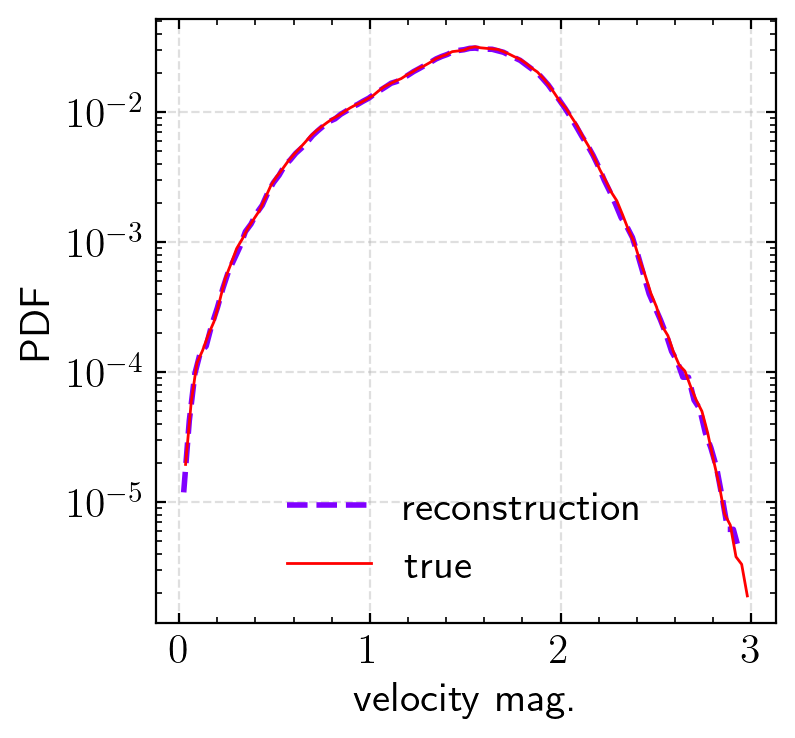

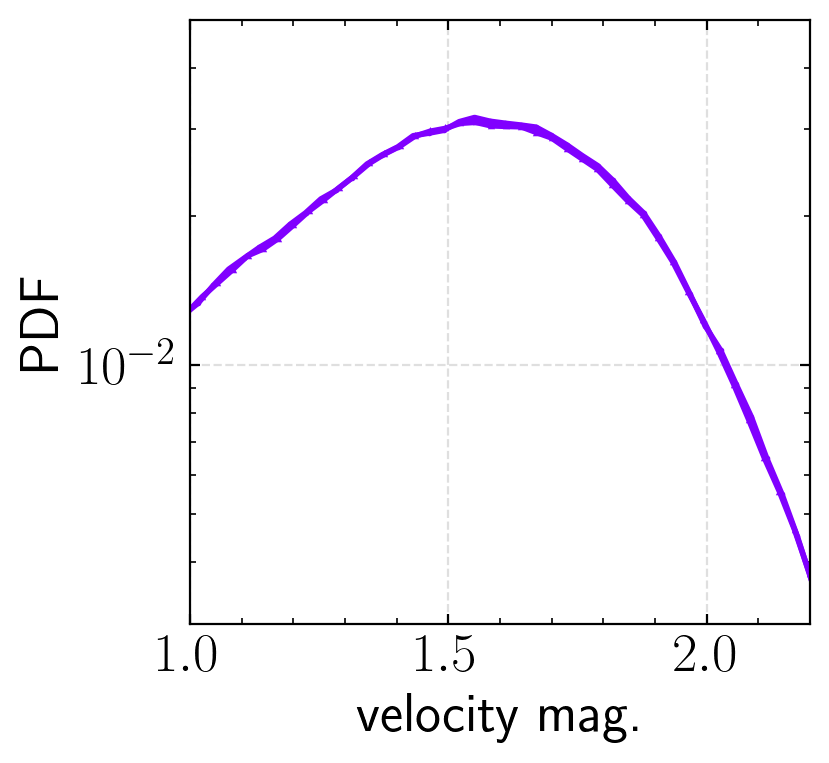

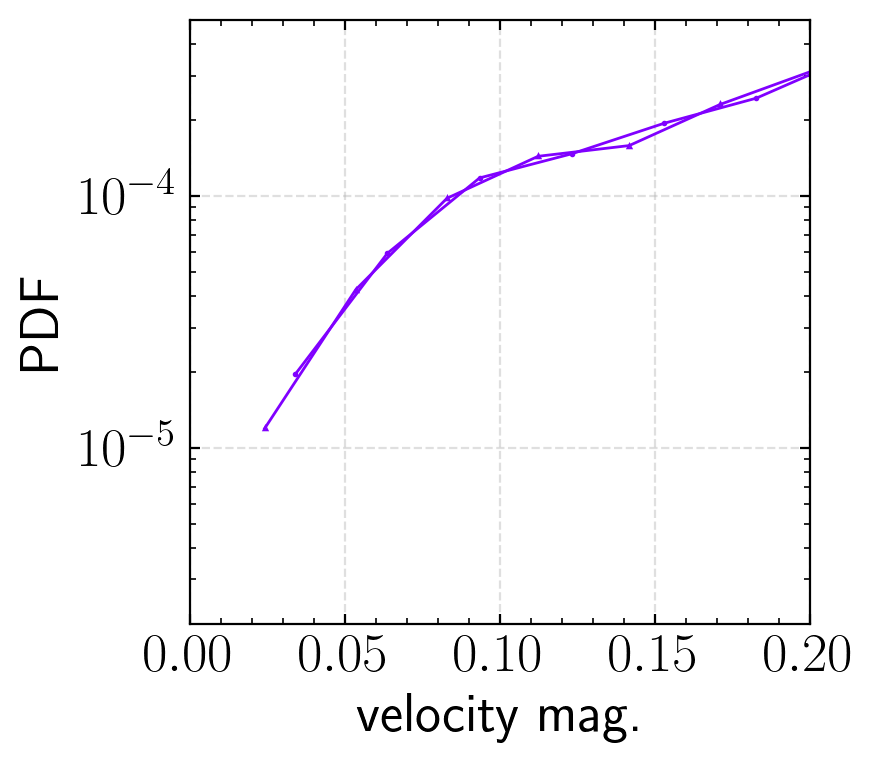

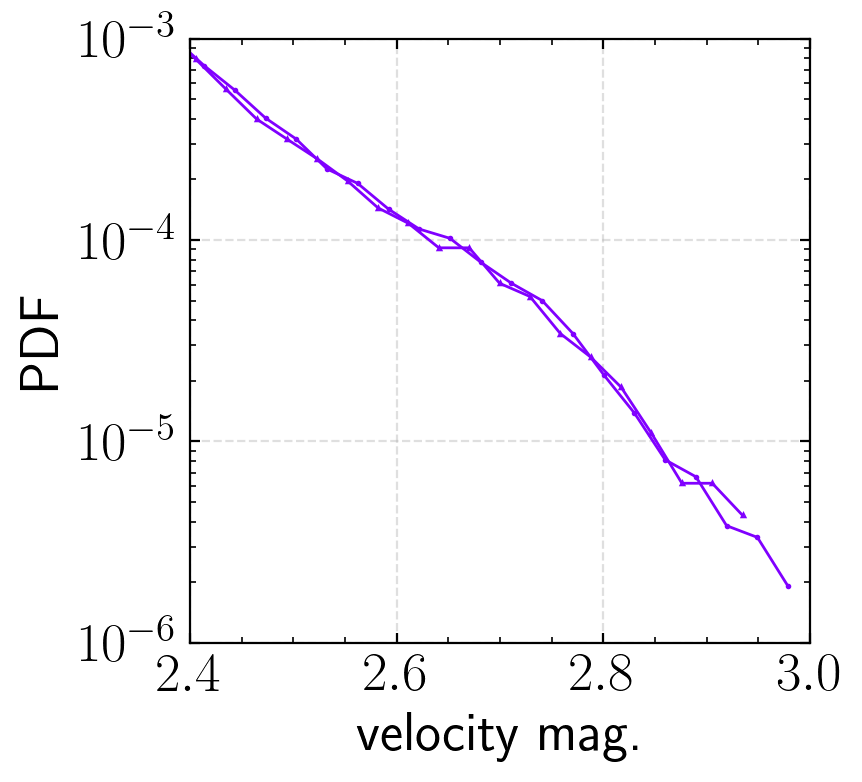

In [4]:
NAME = 'umag'
xlabel_name = 'velocity mag.'
zoom1_range_x = [1.0,2.2]
zoom1_range_y = [3e-3,5e-2]

zoom2_range_x = [0,0.2]
zoom2_range_y = [2e-6,5e-4]

zoom3_range_x = [2.4,3]
zoom3_range_y = [1e-6,1e-3]

plot_PDF(NAME, xlabel_name, zoom1_range_x, zoom1_range_y,
            zoom2_range_x,zoom2_range_y,zoom3_range_x,zoom3_range_y)

# Gradient U_xx

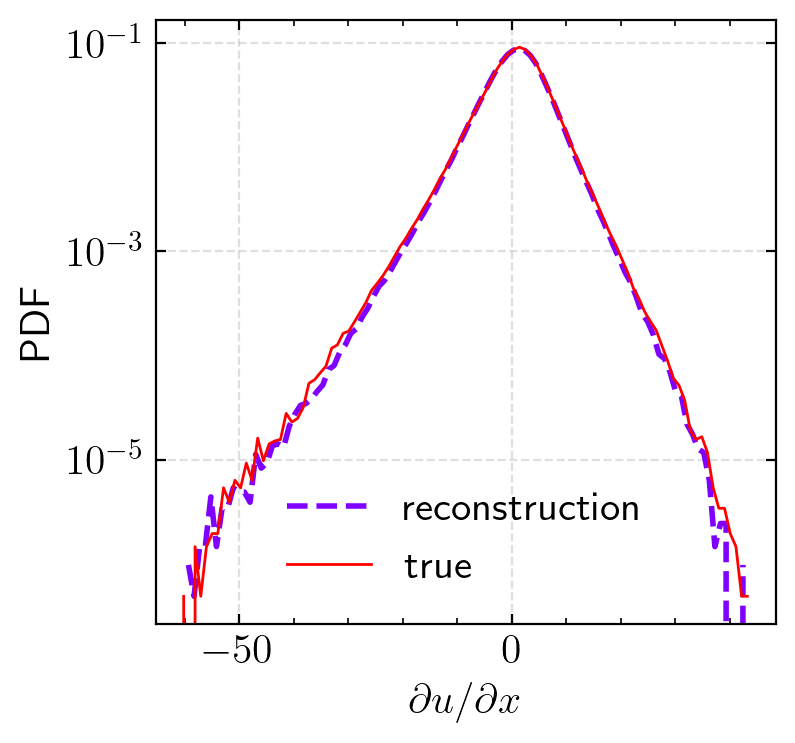

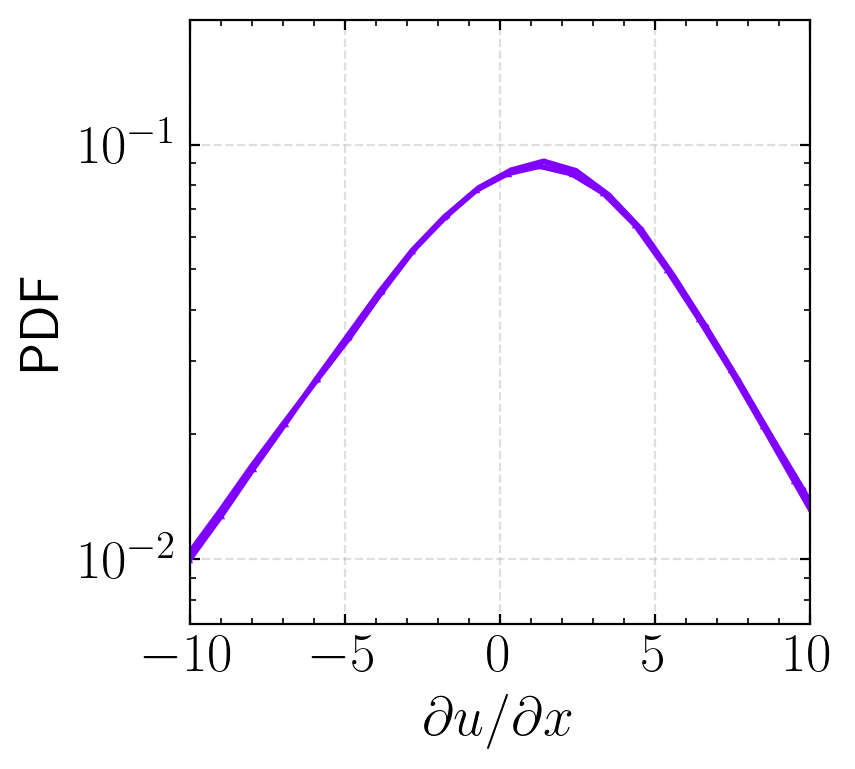

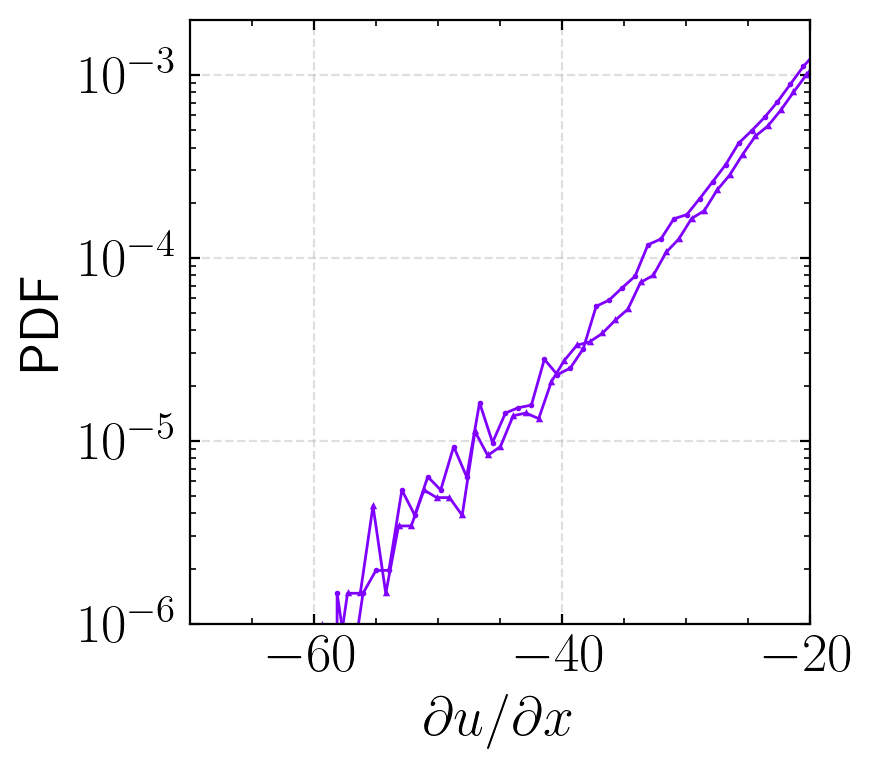

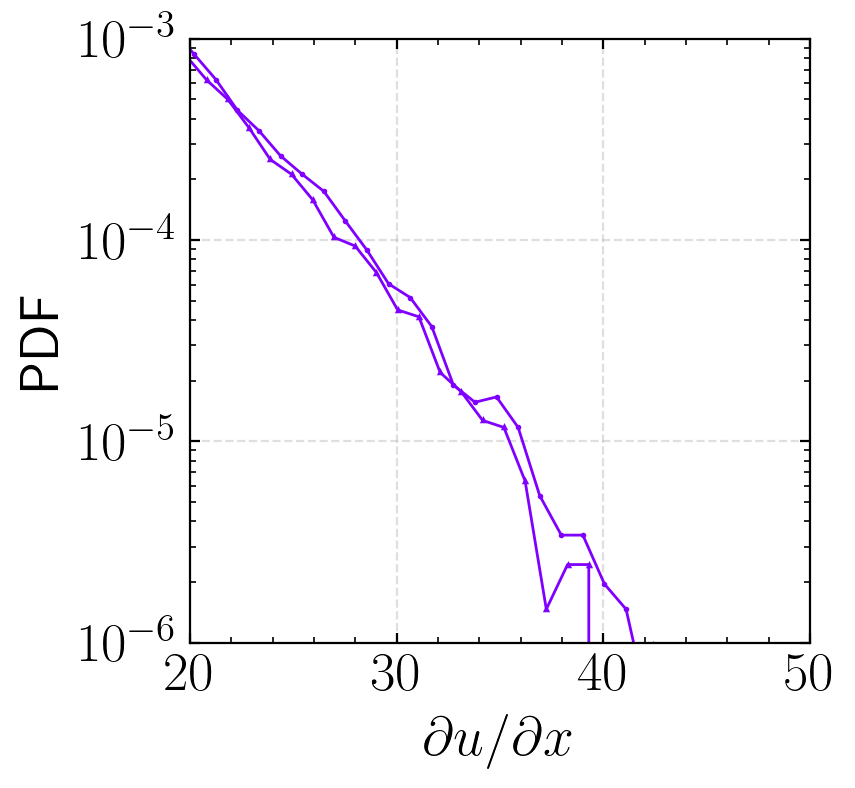

In [5]:
NAME = 'gd0'
xlabel_name = '$\partial u/\partial x$'
zoom1_range_x = [-10,10]
zoom1_range_y = [7e-3,2e-1]

zoom2_range_x = [-70,-20]
zoom2_range_y = [1e-6,2e-3]

zoom3_range_x = [20,50]
zoom3_range_y = [1e-6,1e-3]

plot_PDF(NAME, xlabel_name, zoom1_range_x, zoom1_range_y,
            zoom2_range_x,zoom2_range_y,zoom3_range_x,zoom3_range_y)

# Gradient Uxy

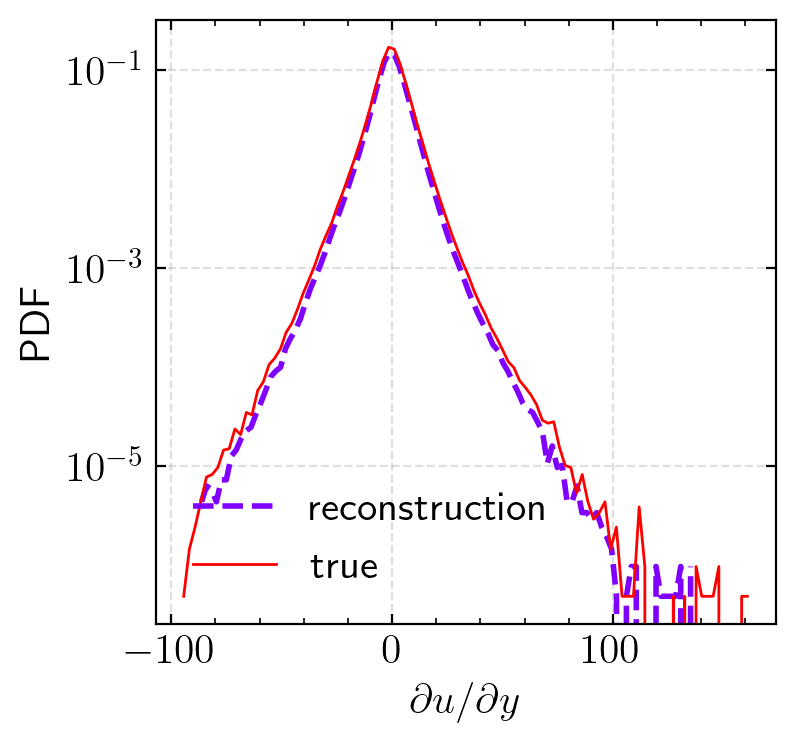

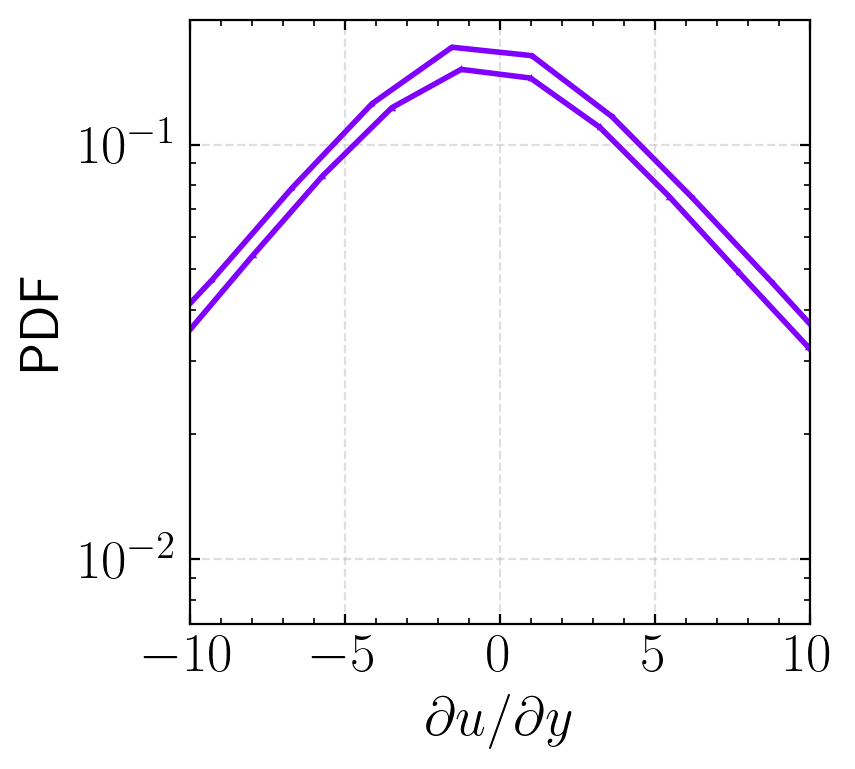

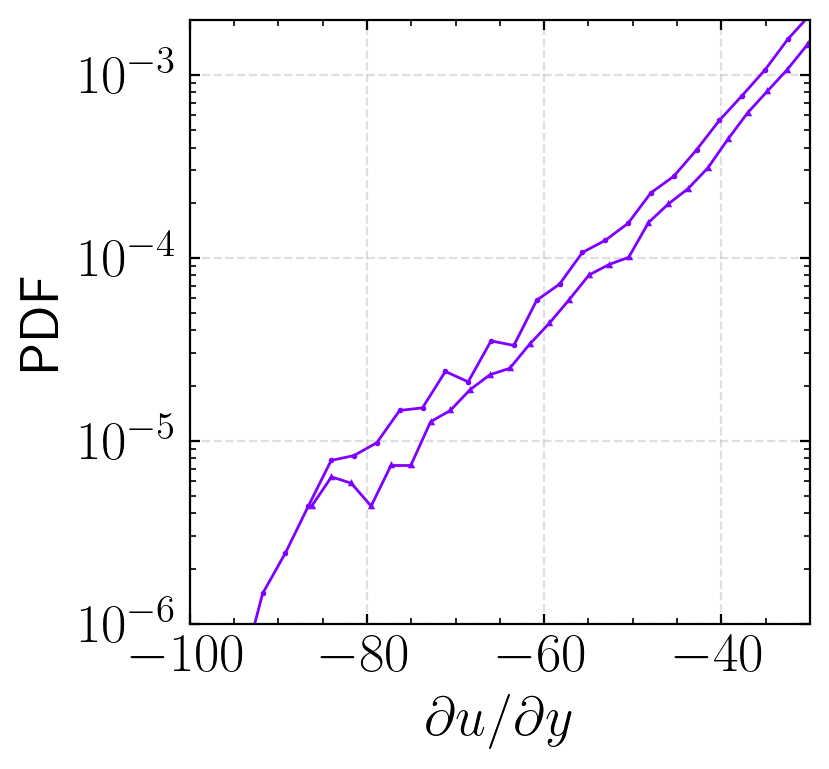

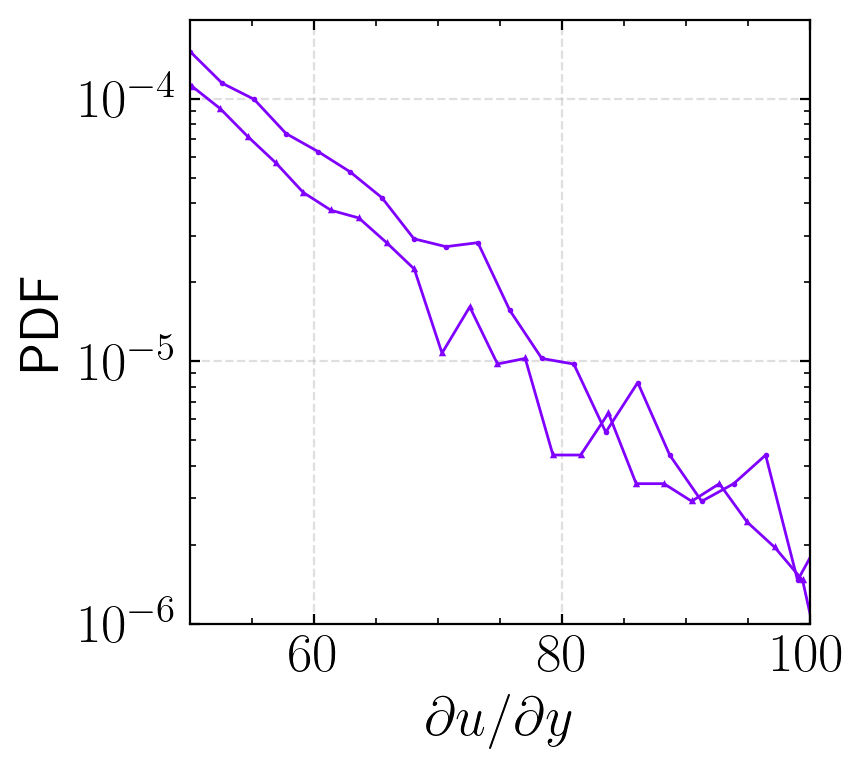

In [6]:
NAME = 'gd1'
xlabel_name = '$\partial u/ \partial y$'
zoom1_range_x = [-10,10]
zoom1_range_y = [7e-3,2e-1]

zoom2_range_x = [-100,-30]
zoom2_range_y = [1e-6,2e-3]

zoom3_range_x = [50,100]
zoom3_range_y = [1e-6,2e-4]

plot_PDF(NAME, xlabel_name, zoom1_range_x, zoom1_range_y,
            zoom2_range_x,zoom2_range_y,zoom3_range_x,zoom3_range_y)

# Gradient Uxz

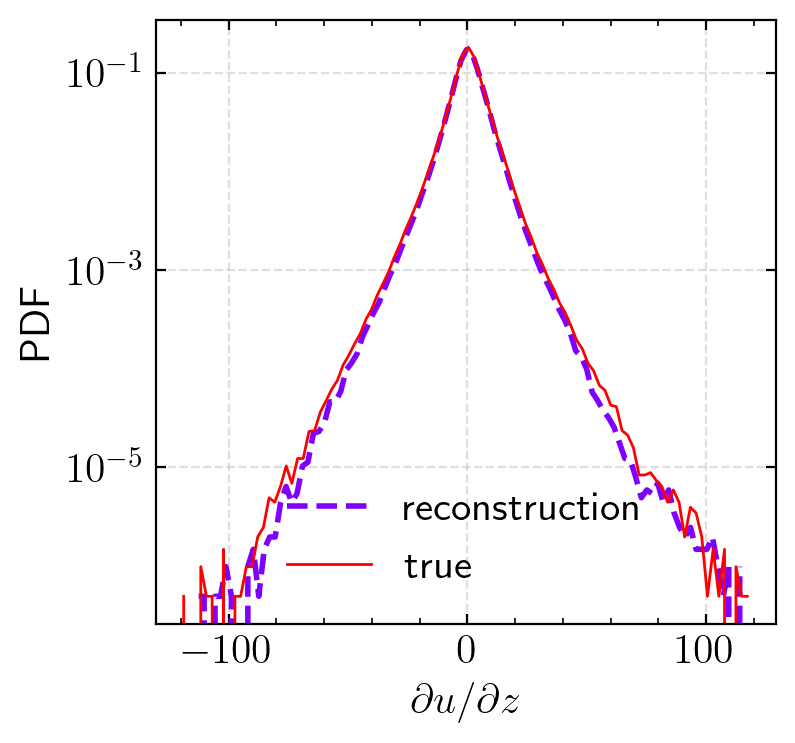

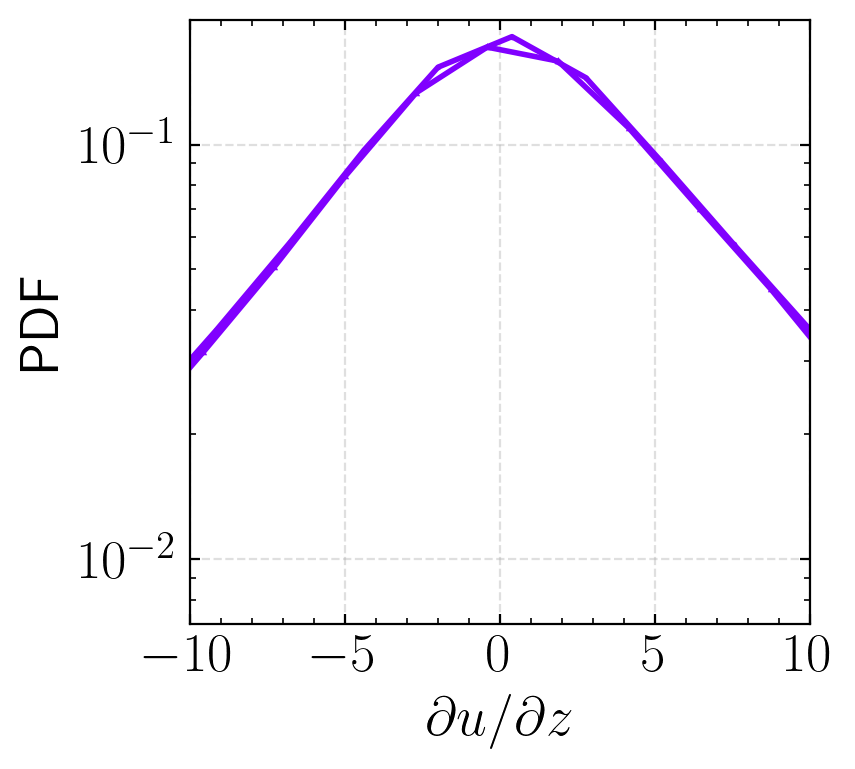

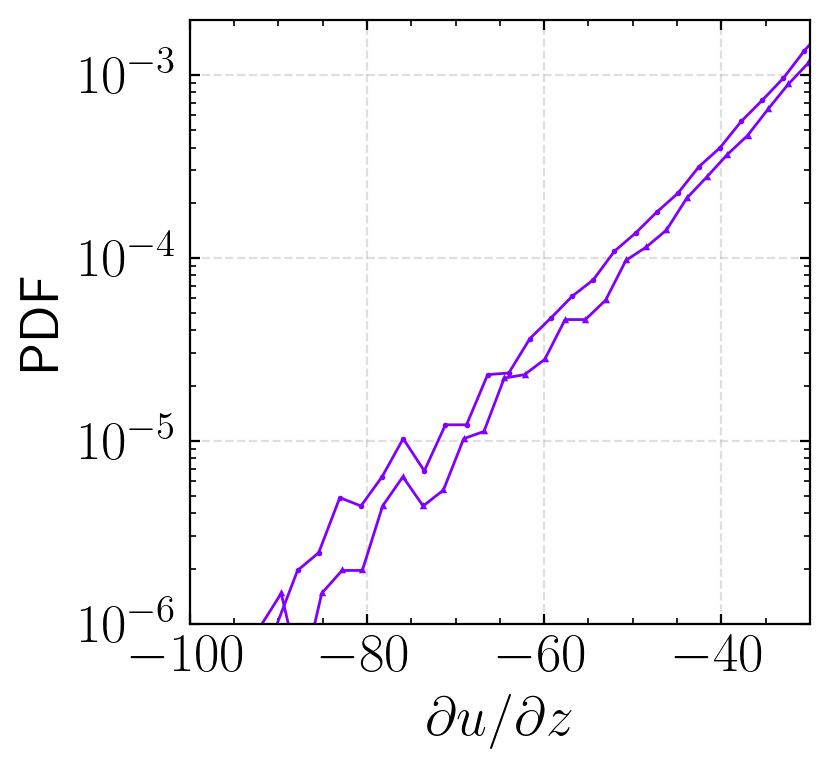

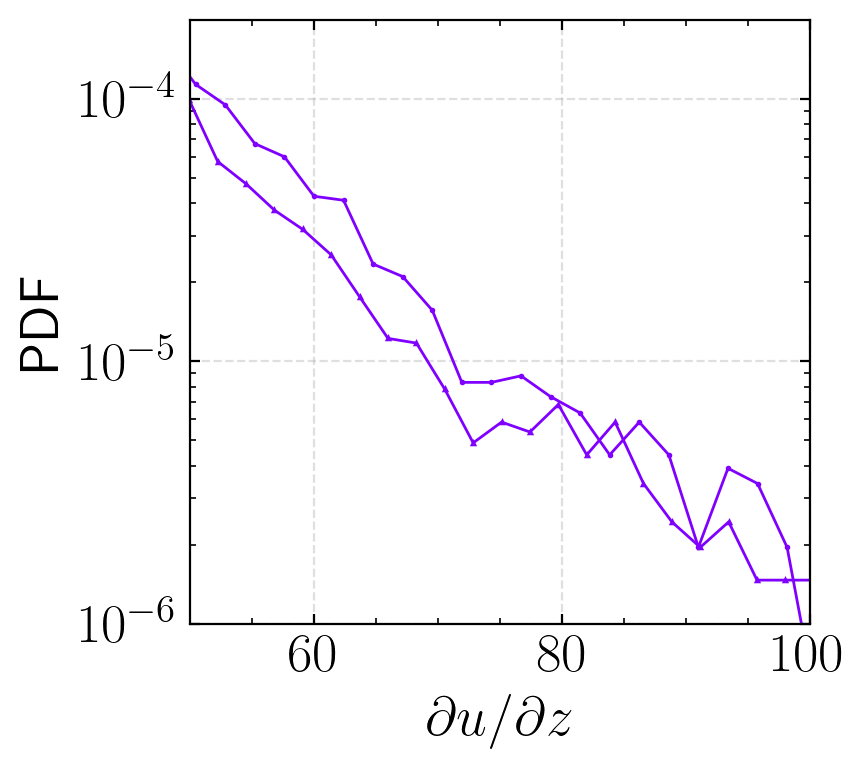

In [7]:
NAME = 'gd2'
xlabel_name = '$\partial u / \partial z$'
zoom1_range_x = [-10,10]
zoom1_range_y = [7e-3,2e-1]

zoom2_range_x = [-100,-30]
zoom2_range_y = [1e-6,2e-3]

zoom3_range_x = [50,100]
zoom3_range_y = [1e-6,2e-4]

plot_PDF(NAME, xlabel_name, zoom1_range_x, zoom1_range_y,
            zoom2_range_x,zoom2_range_y,zoom3_range_x,zoom3_range_y)